#Title: Lines (Hough) and Edge Detection (Filters)
* **Type of Content**: Documentation
* **Domain**: Machine Learning
* **Module**: ML_for_Seqential_Data_&_Visual_Data

# Line Detection using Hough transform
Line detection is an algorithm that takes a collection of n edge points and finds all the lines on which these edge points lie.

## Hough Transform:
Hough transform is used to find aligned points in images that create lines.<br>
The straight line is normally parameterized as y = mx + b where m is the slope and b is the intercept. The line can also be represented as r = xcos(theta) + ysin(theta) where r is the distance from the origin to the closest point on the straight line.<br>
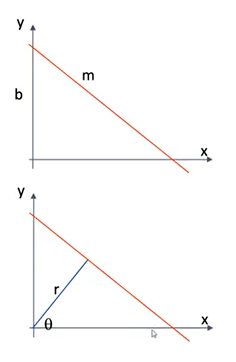<br>

(r, theta) corresponds to the hough space representation of a line. So the entire line can be just represented by r and theta values. So each line in this coordinate system is just one data point. As it is a point infinite lines will pass through it. In fact if we have n points that lie on a straight line, we get n lines in xy plane. So we need to find a line that would pass through all these points.<br>
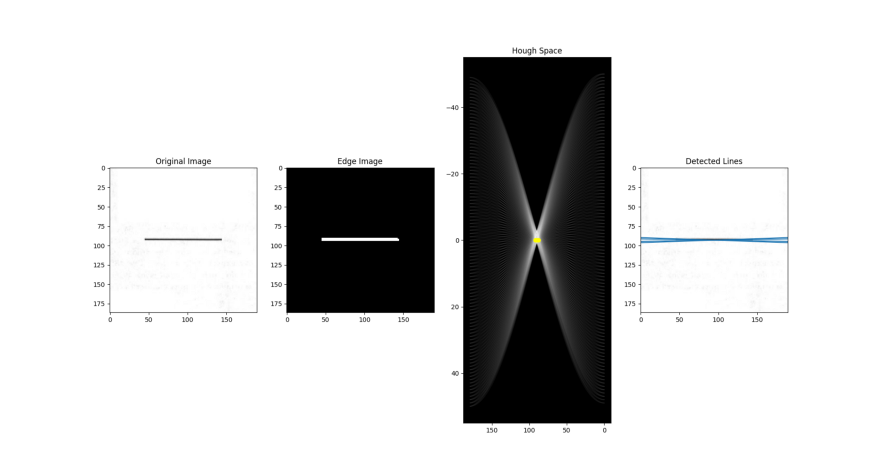<br>
[Image source](https://towardsdatascience.com/lines-detection-with-hough-transform-84020b3b1549)

In [ ]:
import cv2  #OpenCV
import numpy as np
from google.colab.patches import cv2_imshow

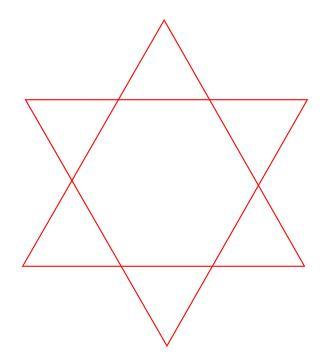

In [ ]:
img = cv2.imread('star.jpg') #reading an image
cv2_imshow(img)   #display an image
#Image link: https://cdn3.edurev.in/ApplicationImages/Temp/1469eb45-2074-4f7a-8d49-91ff0748f765_lg.jpg

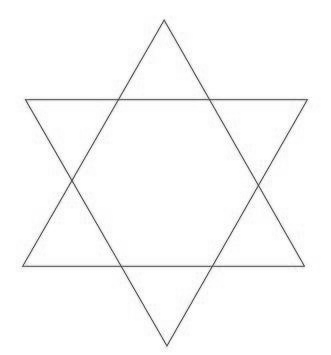

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   #cvtColor (used to convert an image from one color space to another)
cv2_imshow(gray_img)

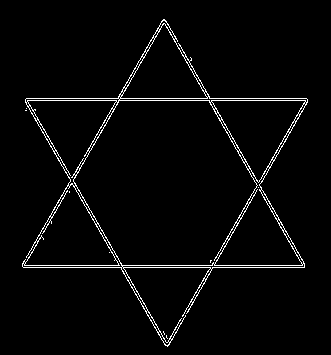

In [ ]:
edges = cv2.Canny(gray_img, 75, 150)
cv2_imshow(edges)

In [ ]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap=10)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2,y2), (0, 255, 0), 3)

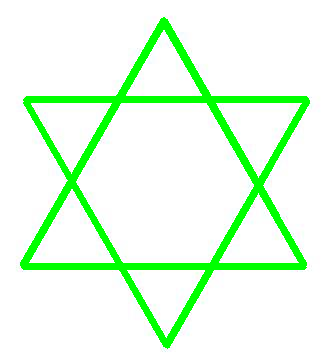

In [ ]:
cv2_imshow(img)

# Edge Detection using Filters
An edge is a set of connected pixels that lies on the boundary between two regions which differ in gray value. Pixels on edge is known as edge points.
Edge provide an outline of the object.<br>
* It locates sharp changes in the intensity function.
* Edges are pixels where brightness changess abruptly.
* An edge can be extracted by computing the derivative of the image function.

Edge detection is used for image segmentation and data extraction in the areas such as image processing, computer vision and machine learning.

### Types of edges:<br>
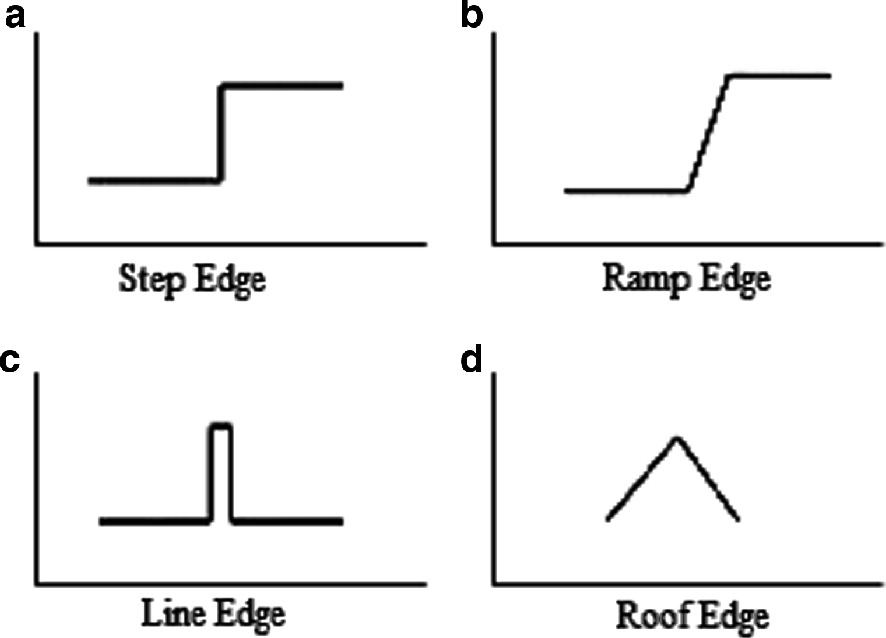<br>
[Image source](https://link.springer.com/chapter/10.1007/978-981-15-7486-3_30)

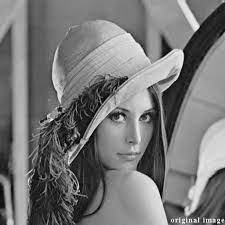

In [ ]:
img = cv2.imread('leena.jpg',0)
cv2_imshow(img)
#Image link: https://en.wikipedia.org/wiki/Lenna

### Laplacian Operator:
Laplacian is the sum of the second derivative of the image with respect to x and y. <br>
Laplacian operator does not provide the direction or the orientation of the edge. You just have to go to the zero-crossings and that's where the edge lie. When you get a vey sharp change from positive to negative (in the second derivative graph) is called a zero-crossing.<br>
Laplacian uses only one filter<br>
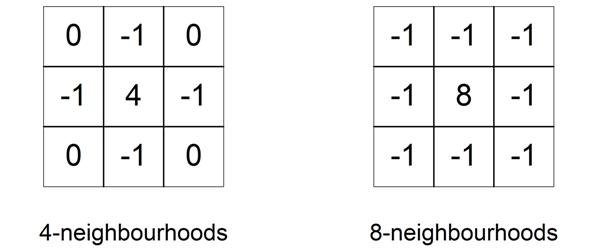<br>
[Image source](https://www.researchgate.net/figure/Laplacian-mask-operator_fig7_253777814)

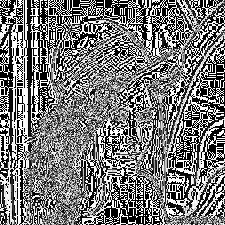

In [ ]:
laplacian_image = cv2.Laplacian(img, cv2.CV_64F)
laplacian_image = np.uint8(laplacian_image)
cv2_imshow(laplacian_image)

### Sobel Operator:
Sobel uses first order derivative to identify the edges. It computes the gradient approximation of image intensity function for image edge detection. The gradient can be calculated as follows:<br>
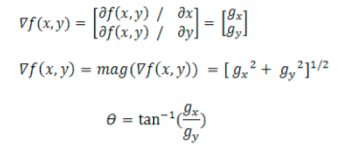<br>
[Image source](https://www.sciencedirect.com/science/article/pii/S2212017312006111)<br>
At the pixels of an image, the Sobel operator produces either the normal to a vector or the corresponding gradient vector. It uses two 3x3 filters which are convolved with the original image to emphasize horizontal or vertical edge.<br>
Filters:<br>
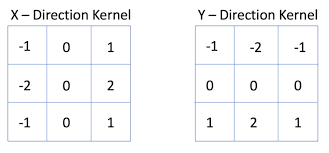<br>
[Image source](https://www.projectrhea.org/rhea/index.php/An_Implementation_of_Sobel_Edge_Detection)

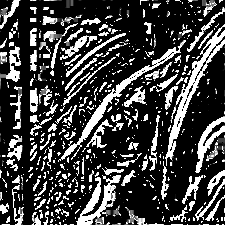

In [ ]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_img = cv2.bitwise_or(sobel_x, sobel_y)
cv2_imshow(sobel_img)

### Canny Operator:
It is a gaussian-based operator in detecting edges. This operator is not susceptible to noise. It extracts image features without affecting or altering the feature. It is the most efficient operator to detect edges.

**Steps:**
* Applies gaussian blur (removes noise in the input image)
* Identify gradient intensity of the image
* Removes the pixels that are not edges
* Applies hysteresis


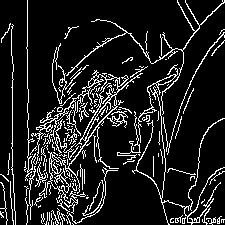

In [ ]:
canny_image = cv2.Canny(img, 100, 200) 
cv2_imshow(canny_image)

## Summary
Computer vision is a field of Artificial Intelligence that enables computers to extract important and meaningful information from images or videos. In this task we saw how to detect lines and edges in an image.<br>
There are various applications of edge detection such as:
* Medical imaging
* Locate an object in satellite images
* automatic traffic controlling systems
* face recognition
* fingerprint recognition

#### References
* https://www.geeksforgeeks.org/image-edge-detection-operators-in-digital-image-processing/
* https://www.sciencedirect.com/science/article/pii/S2212017312006111
* https://towardsdatascience.com/lines-detection-with-hough-transform-84020b3b1549